## Document Analysis: Computational Methods - Summer Term 2025
### Lectures: Jun.-Prof. Dr. Andreas Spitz
### Tutorials: Julian Schelb
### Authors/Team: Yu Zeyuan, Anna Werner, Buket Zak

# Exercise 01

### You will learn about:

- tokenization
- data cleaning and stop word removal
- stemming
- zipf's law

---

## Task 1 - Tokenization:

### Part 1

Describe what tokenization is, how it is performed, and what problems it solves.

Tokenization simply put means splitting a textual input into a sequence of the words (or sentences) it consists of. Text is split where there are whitespaces, however, punctuation, hyphens, apostophes etc. may also indicate split points, though not necessarily universally so for the whole text. Also, not every langauge is in need of white spaces, in which case we can apply alorithms like Maximum Matching. Tokens can be normalized by stemming and/or lemmatization. Still, tokenization allows to afterwards filter out stopwords that carry no meaning for and are therefore a hinderance for the analysis. It further allows to extract meaning from compund words when splitting those. 

### Part 2
The texts.json file contains three datasets called "debates", "reddit", and "tv".

For the later analysis of each dataset, we need to identify single tokens. Therefore, you have to use a library to separate single tokens from the text. We will use the methods offered by `nltk` for this.

In [1]:
import os
import json
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
with open('data/texts.json', 'r') as infile:
    data = json.load(infile)

content_debates = data['debates']
content_reddit = data['reddit']
content_tv = data['tv']

In [7]:
# 1. Tokenize the text content for the three datasets above
# 2. Print the first 20 tokens for each dataset
# 3. Now display the first paragraphs of the corresponding original text and study them.
#    (do _not_ use print(), but just the debug view of jupyter notebook which retains control characters) 

# CODE SUBMISSION ANSWER HERE (Double click to edit)
#1.
debates_tokens = nltk.tokenize.word_tokenize(content_debates)
reddit_tokens = nltk.tokenize.word_tokenize(content_reddit)
tv_tokens = nltk.tokenize.word_tokenize(content_tv)
#2.
print("Debates tokens:\n", debates_tokens[:20])
print("Reddit tokens:\n", reddit_tokens[:20])
print("TV tokens:\n", tv_tokens[:20])

Debates tokens:
 ['Good', 'evening', 'from', 'Hofstra', 'University', 'in', 'Hempstead', ',', 'New', 'York', '.', 'I', 'am', 'Lester', 'Holt', ',', 'anchor', 'of', '``', 'NBC']
Reddit tokens:
 ['*', '*', 'ALL', 'USERS', ':', 'PLEASE', 'CONSIDER', 'THIS', 'YOUR', 'ONE', 'AND', 'ONLY', 'WARNING', '*', '*', 'This', 'is', 'a', 'reminder', 'that']
TV tokens:
 ['``', 'THE', 'TERMS', 'WERE', 'LAID', 'OUT', '.', 'I', 'WROTE', '--', '>', '>', 'YOU', 'CALLED', 'IT', 'THE', 'GOLD', 'STANDARD', '.', "''"]


In [8]:
#3.1
content_debates[0:500]

' Good evening from Hofstra University in Hempstead, New York. I am Lester Holt, anchor of "NBC Nightly News.” I want to welcome you to the first presidential debate.\nThe participants tonight are Donald Trump and Hillary Clinton. This debate is sponsored by the Commission on Presidential Debates, a nonpartisan, nonprofit organization. The commission drafted tonight\'s format, and the rules have been agreed to by the campaigns.\nThe 90-minute debate is divided into six segments, each 15 minutes long'

In [9]:
#3.2
content_reddit[0:500]

"**ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING**\n\nThis is a reminder that this subreddit has strict posting/commenting rules that will be enforced by moderation. If you are new to this subreddit, please read our sidebar before commenting. \n\n- Don't post low effort comments (ie- jokes, memes, slogans, or links without context).\n\n- Do not personally insult other Redditors. Do not post racist, sexist, homophobic, bigoted, or otherwise discriminatory content.\n\n- Meta discussion (discuss"

In [10]:
#3.3
content_tv[0:500]

'"THE TERMS WERE LAID OUT. I WROTE -- >> YOU CALLED IT THE GOLD STANDARD."\n  YEAH."\n  SECRETARY CLINTON. >> I HAVE A FEELING BY THE END OF THIS"\n "THAT ARE INEFFECTIVE. STOP AND FRISK WAS FOUND TO BE UNCONSTITUTIONAL AND IN PART BECAUSE IT WAS"\n  TO KENYA TO FIND OUT ABOUT IT. THEY WERE PRESSING IT"\n  SO HE TRIED TO PUT THE WHOLE RACIST BIRTHER LIE TO BED. IT CAN\'T BE DISMISSED THAT EASILY. HE HAS REALLY STARTED HIS POLITICAL ACTIVITY BASED ON THIS RACIST LIE THAT OUR FIRST"\n  PRESIDENT OBAMA AND'

### Part 3

Does this what you expected it to do? How well does the tokenization work? What happens to special characters? Can you think of any problems?

The word tokenizer splits the text where there are:
white spaces. Punctuation is recognized and retained as an own token. Formatting symbols liek "\n\n" are recognized and cut out.
Problems: 
Words that belong together like f.e. names will be split.
Probably, abbreviated words will not be recognized as such, since every punctuation character is tretaed the same regardless of its environment.
Won't recognize emoticons.
Tokens are not normalized (upper/lower case etc.)
..

---

## Task 2 - Data Cleaning and Stop Word Removal:


### Part 1

In two to three sentences, describe what *data cleaning* in the context of text data refers to.

Data Cleaning with text data means tokenizing the text, remove unneccary puncutation and characters, remove stopwords, and then apply lowercasing and stemming/lemmatization to normalize tokens.

### Part 2

To have more accurate word counts and visualizations, it is often helpful to remove the capitalization of words. This is especially true for languages like German. In the following, for the three texts from above, remove any capitalization.

In [13]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
#1.
debates_lower = content_debates.lower()
reddit_lower = content_reddit.lower()
tv_lower = content_tv.lower()

### Part 3

Apply tokenization to the lowercase version of the texts.

In [14]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
debates_lower_tokens = nltk.tokenize.word_tokenize(debates_lower)
reddit_lower_tokens = nltk.tokenize.word_tokenize(reddit_lower)
tv_lower_tokens = nltk.tokenize.word_tokenize(tv_lower)

### Part 4

In two to three sentences, describe what *stop word removal* in the context of text data refers to.

Stopwords are words that occur with very high frequency in a language but carry little meaning, mostly they are function words. They are not interesting for conent analysis and will hinder the analysis.

### Part 5

Now apply stop word removal to the three datasets.

Hint: Assume the texts are all written in _English_.

In [16]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
stop_words = set(nltk.corpus.stopwords.words('english'))
debates_filtered = [word for word in debates_lower_tokens if word not in stop_words]
reddit_filtered = [word for word in reddit_lower_tokens if word not in stop_words]
tv_filtered = [word for word in tv_lower_tokens if word not in stop_words]

In [17]:
print("Debates tokens:\n", debates_filtered[:20])
print("Reddit tokens:\n", reddit_filtered[:20])
print("TV tokens:\n", tv_filtered[:20])

Debates tokens:
 ['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.', 'lester', 'holt', ',', 'anchor', '``', 'nbc', 'nightly', 'news.', '”', 'want', 'welcome']
Reddit tokens:
 ['*', '*', 'users', ':', 'please', 'consider', 'one', 'warning', '*', '*', 'reminder', 'subreddit', 'strict', 'posting/commenting', 'rules', 'enforced', 'moderation', '.', 'new', 'subreddit']
TV tokens:
 ['``', 'terms', 'laid', '.', 'wrote', '--', '>', '>', 'called', 'gold', 'standard', '.', "''", 'yeah', '.', "''", 'secretary', 'clinton', '.', '>']


### Part 6

Now compare the first original sentence for each dataset with the parts remaining after performing the above steps. Write them down and explain what happens.

### Debates
' Good evening from Hofstra University in Hempstead, New York.!

['good', 'evening', 'hofstra', 'university', 'hempstead', ',', 'new', 'york', '.']

### Reddit
"\*\*ALL USERS: PLEASE CONSIDER THIS YOUR ONE AND ONLY WARNING\*\*\\n\\n

['*', '*', 'users', ':', 'please', 'consider', 'one', 'warning', '*', '*']

### TV
'"THE TERMS WERE LAID OUT. '

['``', 'terms', 'laid', '.']

Full texts are turned to lower case.
Words are split into tokens at white spaces, formatting indicators, and puntuations and other non-alphanumeric characters. 
The former two are stripped and do not appear as tokens, punctuation marks appear as own tokens.
Characters aren't stopwords, so we still have many elements that we want to remove.

---

## Task 3 - Stemming:


### Part 1

In two to three sentences, describe what *stemming* in the context of text data refers to.

Stemming means normalizing tokens so that they are gradually reduced to their word-stems.

### Part 2

Think about how you would go about implementing your own stemmer?
Come up with at least ten rules and write them down.

Hint: For example:

```*s -> *   # remove trailing s```

```*s -> *   # remove trailing s```

\# TEXT SUBMISSION ANSWER HERE (Double click to edit) - expected approx. 50-100 words including the rules

### Part 3

Use the cleaned word tokens (Step 5 above) and apply stemming. Use the Snowball Stemmer.

In [19]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
stemmer = nltk.stem.SnowballStemmer('english')
debates_stemmed = [stemmer.stem(word) for word in debates_filtered]
reddit_stemmed = [stemmer.stem(word) for word in reddit_filtered]
tv_stemmed = [stemmer.stem(word) for word in tv_filtered]

In [22]:
debates_stemmed[:20]

['good',
 'even',
 'hofstra',
 'univers',
 'hempstead',
 ',',
 'new',
 'york',
 '.',
 'lester',
 'holt',
 ',',
 'anchor',
 '``',
 'nbc',
 'night',
 'news.',
 '”',
 'want',
 'welcom']

### Part 4

Compare the results of the Snowball Stemmer with your stemming rules. How do they differ, how could you improve your stemmer?

\# TEXT SUBMISSION ANSWER HERE (Double click to edit) - expected approx. 100-200 words

### Part 5

Create the word clouds from ex00 again, but now with the preprocessed text.
(Remark: You can use the *create_word_cloud* method provided in the *utils.py*)

What changes do you see?

Reddit:


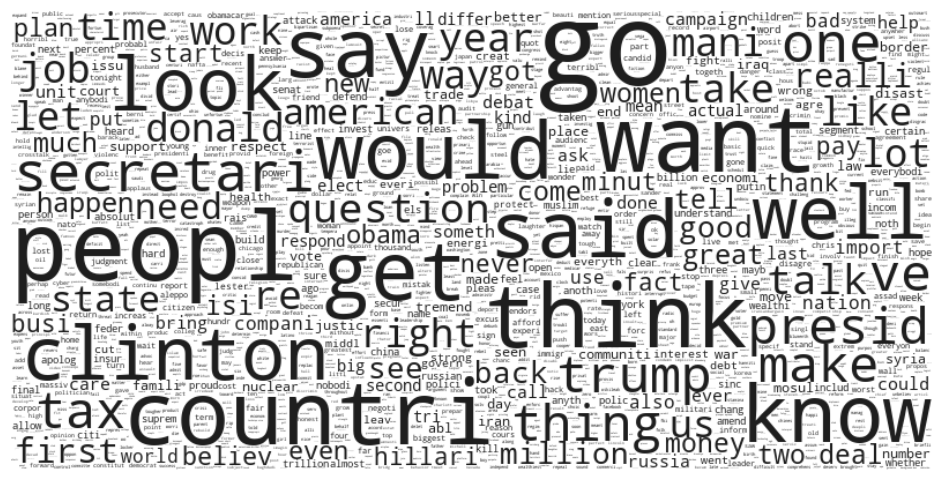

Debate:


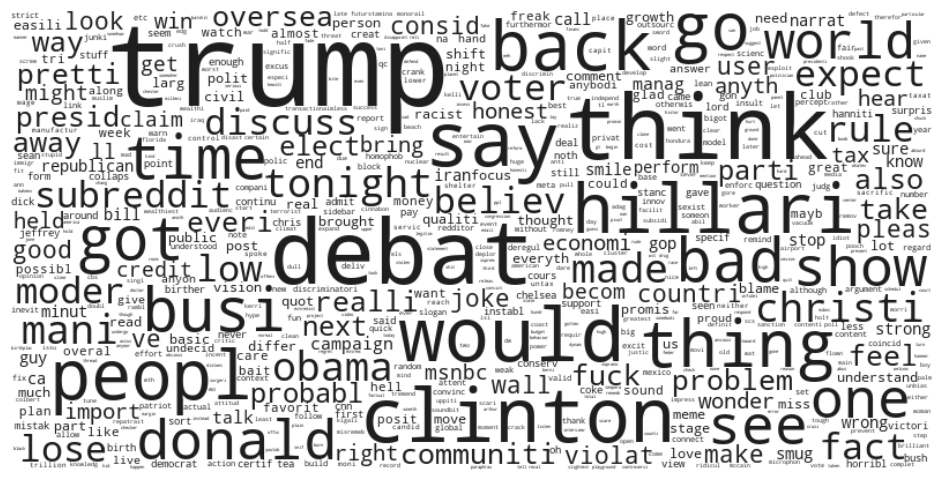

TV:


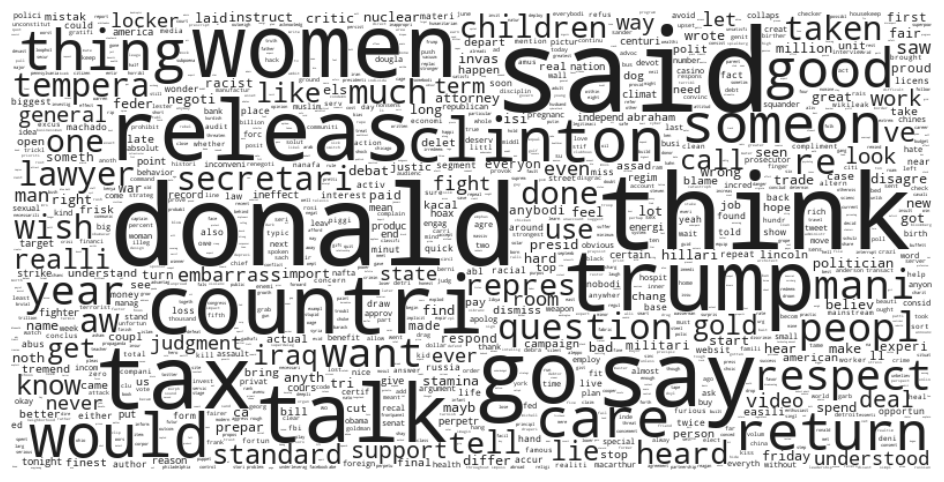

In [36]:
from utils import create_word_cloud

# CODE SUBMISSION ANSWER HERE (Double click to edit)
def count_tokens(token_list):
    """
    Count the number of valid tokens in a list (ignores punctuation and single characters).
    """
    token_dict = {}
    for token in token_list:
        if len(token) > 1 and token.isalpha():
            if token in token_dict:
                token_dict[token] += 1
            else:
                token_dict[token] = 1
    return token_dict

# count 
debate_counts = count_tokens(debates_stemmed)
reddit_counts = count_tokens(reddit_stemmed)
tv_counts = count_tokens(tv_stemmed)

# create word clouds:
create_word_cloud(debate_counts, "Reddit")
create_word_cloud(reddit_counts, "Debate")
create_word_cloud(tv_counts, "TV")

Previously, in ex00, I removed punctuation. This seems not yet to be wanted here, however after second thought I still filtered them out in the token_count function with `if len(token) > 1 and token.isalpha():`.
One could further set a threshold to remove rare tokens and get a clearer word cloud.
Since I didn't do the latter, these wordclouds here are still quite noisy. The main difference to the clouds in ex00 is that we see the stemmed tokens here.

## Task 4 - Zipf's Law:

In the lecture, you have heard about Zipf’s law. 

### Part 1

State Zipf's law

Zipf's Law:

The frequency of a word is inversely proportional to it's rank. 

$\mathsf{word\ frequency} \propto \frac{1}{\mathsf{word\ rank}}$


### Part 2

Check if Zipf's law (approximately) holds for our three datasets after all preprocessing steps.

For this, plot Zipf's law and the word distribution for each of the datasets.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/3y/t97x3pxn4837189h0mlwh3yh0000gr/T/ipykernel_37823/3456240724.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(0, 5000, 5000), [np.log(x) for x in range(5000)])


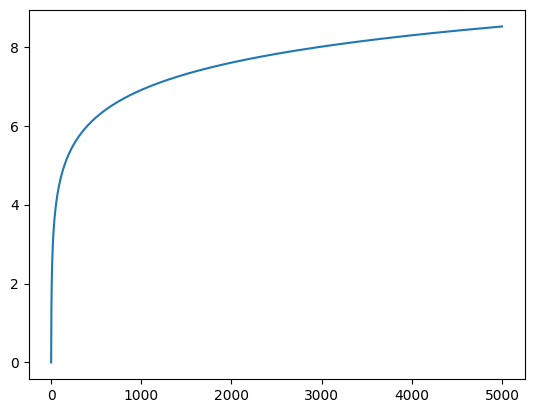

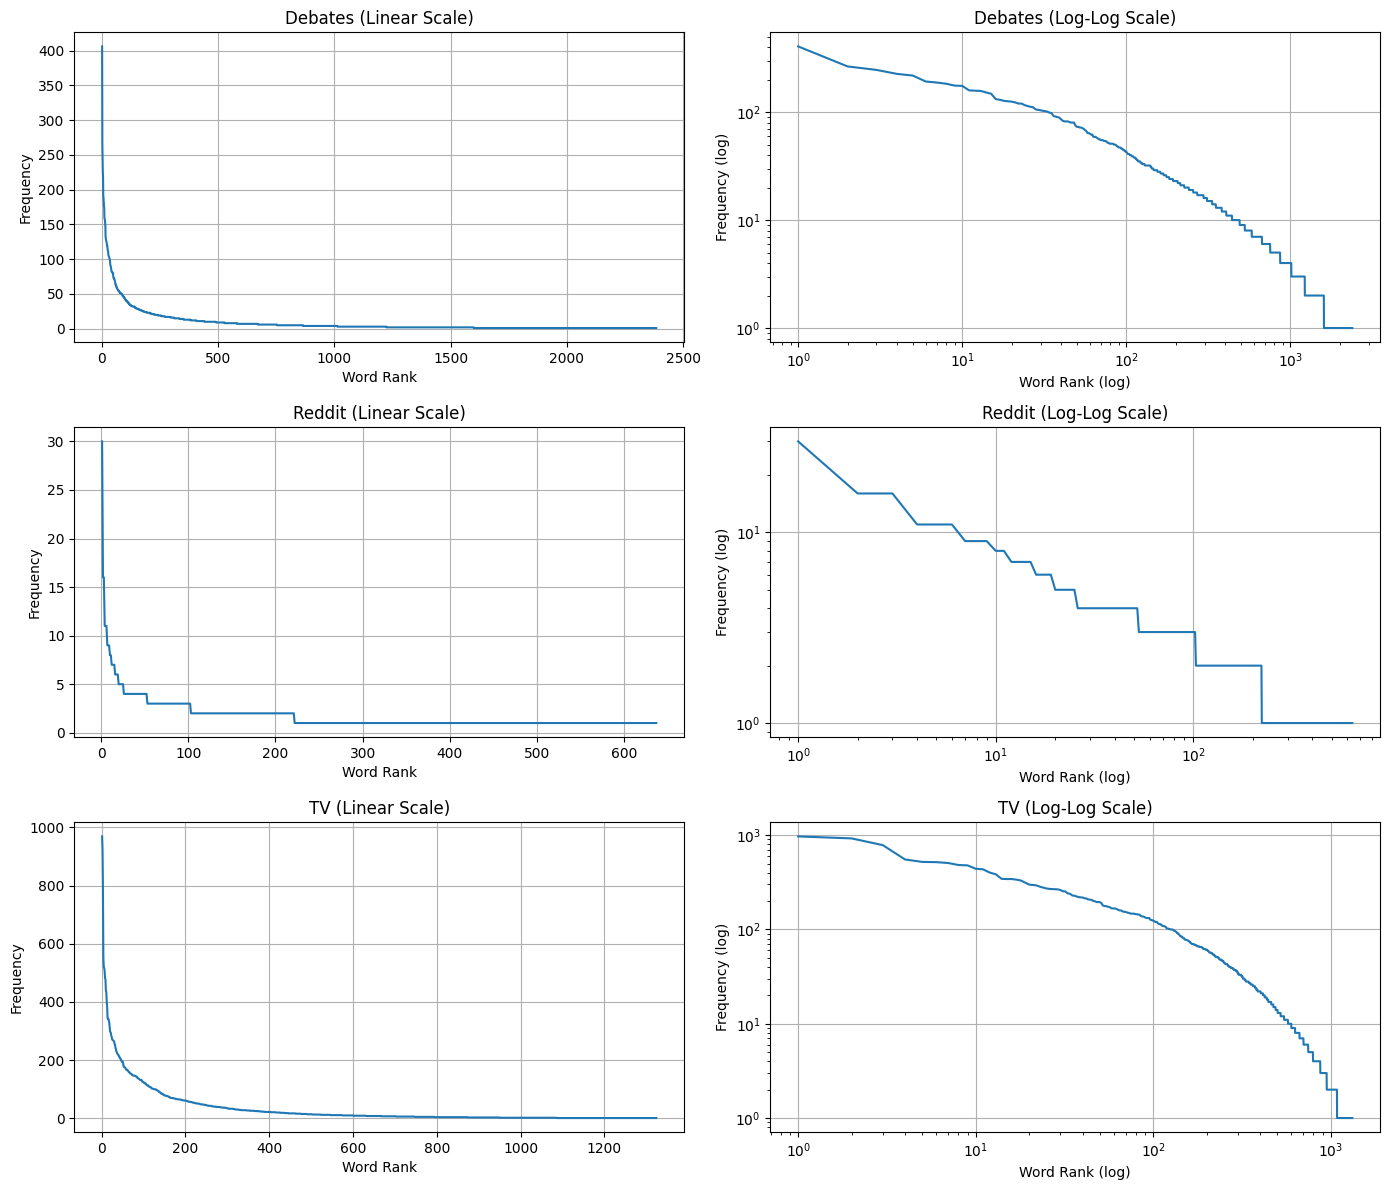

In [42]:
# CODE SUBMISSION ANSWER HERE (Double click to edit)
plt.plot(np.linspace(0, 5000, 5000), [np.log(x) for x in range(5000)])

# Token frequencies decending order
debate_frequencies = sorted(debate_counts.values(), reverse=True)
reddit_frequencies = sorted(reddit_counts.values(), reverse=True)
tv_frequencies = sorted(tv_counts.values(), reverse=True)

# Ranks
debate_ranks = range(1, len(debate_frequencies) + 1)
reddit_ranks = range(1, len(reddit_frequencies) + 1)
tv_ranks = range(1, len(tv_frequencies) + 1)

# Set up a grid: 3 rows (one per dataset), 2 columns (linear + log-log)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Debates - Linear
axs[0, 0].plot(debate_ranks, debate_frequencies)
axs[0, 0].set_title("Debates (Linear Scale)")
axs[0, 0].set_xlabel("Word Rank")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].grid(True)

# Debates - Log-Log
axs[0, 1].plot(debate_ranks, debate_frequencies)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_title("Debates (Log-Log Scale)")
axs[0, 1].set_xlabel("Word Rank (log)")
axs[0, 1].set_ylabel("Frequency (log)")
axs[0, 1].grid(True)

# Reddit - Linear
axs[1, 0].plot(reddit_ranks, reddit_frequencies)
axs[1, 0].set_title("Reddit (Linear Scale)")
axs[1, 0].set_xlabel("Word Rank")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].grid(True)

# Reddit - Log-Log
axs[1, 1].plot(reddit_ranks, reddit_frequencies)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_title("Reddit (Log-Log Scale)")
axs[1, 1].set_xlabel("Word Rank (log)")
axs[1, 1].set_ylabel("Frequency (log)")
axs[1, 1].grid(True)

# TV - Linear
axs[2, 0].plot(tv_ranks, tv_frequencies)
axs[2, 0].set_title("TV (Linear Scale)")
axs[2, 0].set_xlabel("Word Rank")
axs[2, 0].set_ylabel("Frequency")
axs[2, 0].grid(True)

# TV - Log-Log
axs[2, 1].plot(tv_ranks, tv_frequencies)
axs[2, 1].set_xscale('log')
axs[2, 1].set_yscale('log')
axs[2, 1].set_title("TV (Log-Log Scale)")
axs[2, 1].set_xlabel("Word Rank (log)")
axs[2, 1].set_ylabel("Frequency (log)")
axs[2, 1].grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

### Part 3

Describe your plots and discuss your findings.

After pre-processing Zipf's law doesn't hold perfectly any longer but it is still pretty much applies.

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archieve and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or archive for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write your name in the top section.